In [68]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

df_data_all = pd.read_csv('data_code/data_all.csv')

In [69]:
df_data_all.sample(n=15)

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,...,Bottles_Sold,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Review_id,Customer_id,Rating
735088,S26120100007,2015-06-10,1799,260,Inuyasha Brands,4201,Fareway Stores #022 / Sioux City,4040 WAR EAGLE DR,SIOUX CITY,51109,...,6,Killua's Energy,Energy Drink,6,1750.0,4.04,6.06,NaN,NaN,NaN
636541,S21928100049,2014-10-22,34747,277,Joestar Beverage,2594,Hy-Vee Food Store / Sioux City,4500 SERGEANT ROAD,SIOUX CITY,51106,...,1,Ryuuko's Gourmet Black Cherry Soda,Cherry Soda,12,1000.0,3.75,5.63,NaN,NaN,NaN
401169,S11138800014,2013-03-18,10550,115,Deviluke Inc.,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,...,12,Light's Watermelon Cream,Cream Soda,12,750.0,2.45,3.68,NaN,NaN,NaN
437760,S12786500027,2013-06-13,43337,260,Inuyasha Brands,3540,Super Target T-0533 / Davenport,5225 ELMORE AVE,DAVENPORT,52807,...,6,Langley's Energy,Energy Drink,12,1000.0,3.16,4.74,NaN,NaN,NaN
885354,S32327900044,2016-05-16,37991,260,Inuyasha Brands,5198,Riverside Durg,826 E RIVER DR,DAVENPORT,52803,...,12,Ippo's Red Pop,Cherry Soda,12,500.0,2.55,3.82,NaN,NaN,NaN
735824,S26132800160,2015-06-10,80058,55,Arlert Company,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,...,2,Usopp's Lime Soda,Lime Soda,6,1750.0,2.35,3.62,NaN,NaN,NaN
635720,S21843100008,2014-10-22,19067,65,Ayanami Brands,3354,Sam's Club 8238 / Davenport,3845 ELMORE AVE.,DAVENPORT,52807,...,12,Hei's Old Fashioned Cream Soda,Cream Soda,12,1000.0,3.27,4.91,NaN,NaN,NaN
609361,S20634600006,2014-08-13,23824,297,Katou Company,3655,M and M Durg Store,2763 FLOYD BLVD,SIOUX CITY,51104,...,24,Arataka's Watermelon Cream,Cream Soda,24,375.0,1.78,2.66,39253.0,6639.0,1.0
466577,S14089100025,2013-08-26,23826,297,Katou Company,4612,ATC Durg,"214, MYRTLE ST",DAVENPORT,52802,...,12,Arataka's Vanilla Cream Soda,Cream Soda,12,750.0,1.99,2.99,NaN,NaN,NaN
147346,INV-06311100152,2017-07-26,86887,421,Midoriya Inc.,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,...,1,Shouto's Craft Root Beer,Root Beer,12,1000.0,3.17,4.76,NaN,NaN,NaN


In [70]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931812 entries, 0 to 931811
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice_id           931812 non-null  object 
 1   Date                 931812 non-null  object 
 2   Item_id              931812 non-null  int64  
 3   Vendor_id            931812 non-null  int64  
 4   Vendor_Name          931812 non-null  object 
 5   Store_id             931812 non-null  int64  
 6   Store_Name           931812 non-null  object 
 7   Address              931812 non-null  object 
 8   City_Name            931812 non-null  object 
 9   Zip_Code             931812 non-null  int64  
 10  County_id            931812 non-null  int64  
 11  County_Name          931812 non-null  object 
 12  Bottles_Sold         931812 non-null  int64  
 13  Item_Description     931812 non-null  object 
 14  Category             931787 non-null  object 
 15  Pack             

In [71]:
df_data_all['Item_id'] = df_data_all['Item_id'].astype(str)

In [72]:
df_data_all['Vendor_id'] = df_data_all['Vendor_id'].astype(str)

In [73]:
df_data_all['Store_id'] = df_data_all['Store_id'].astype(str)

In [74]:
df_data_all['Zip_Code'] = df_data_all['Zip_Code'].astype(str)

In [75]:
df_data_all['County_id'] = df_data_all['County_id'].astype(str)

In [54]:
df_data_all['Customer_id'] = df_data_all['Customer_id'].astype(str)

In [76]:
df_data_all['Bottles_Sold'] = df_data_all['Bottles_Sold'].astype(float)

In [77]:
df_data_all['Review_id'] = df_data_all['Review_id'].astype(str)

In [78]:
df_data_all ["Purchase_Price"] = (df_data_all["Bottles_Sold"]* df_data_all["Bottle_Retail_Price"])

In [79]:
df_data_all.sample(n=21)

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,...,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Review_id,Customer_id,Rating,Purchase_Price
150226,INV-06443900005,2017-08-02,12407,55,Arlert Company,4452,Select Mart Gordon Dr,2825 GORDON DR,SIOUX CITY,51105,...,Mikasa's Vanilla Cream Soda,Cream Soda,12,1000.0,2.25,3.37,nan,NaN,NaN,13.48
884020,S32264900064,2016-05-11,53629,125,"Emiya Vineyards,LLC",3986,Siouxland Beverage,1203 5 ST,SIOUX CITY,51101,...,Lucy's Orange Soda,Orange Soda,6,750.0,4.14,6.21,nan,NaN,NaN,6.21
725291,S25744700056,2015-05-20,58875,395,Mankanshoku Inc.,3776,Wal-Mart 5115 / Davenport,3101 WEST KIMBERLY RD,DAVENPORT,52806,...,Shiro's Lime,Lime Soda,6,1750.0,2.98,4.47,nan,NaN,NaN,26.82
68719,INV-02918700081,2017-01-25,82846,65,Ayanami Brands,2594,Hy-Vee Food Store / Sioux City,4500 SERGEANT ROAD,SIOUX CITY,51106,...,Law's Root Beer,Root Beer,12,750.0,2.39,3.58,nan,NaN,NaN,3.58
778106,S27944000036,2015-09-16,5439,65,Ayanami Brands,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,...,Shana's Vanilla Cream Soda,Cream Soda,6,750.0,7.42,11.13,nan,NaN,NaN,11.13
338841,S08524500139,2012-10-23,73456,65,Ayanami Brands,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,...,Lavi's Craft Root Beer,Root Beer,12,750.0,2.39,3.58,nan,NaN,NaN,3.58
443960,S13076800209,2013-07-01,53213,115,Deviluke Inc.,2623,Hy-Vee Food Store #4 / Sioux City,2827 HAMILTON BLVD,SIOUX CITY,51104,...,Houtarou's Orange Soda,Orange Soda,24,200.0,1.78,2.67,nan,NaN,NaN,10.68
450978,S13407100018,2013-07-17,31666,434,Minami LLC,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,...,Roy's Raspberry Soda,Raspberry Soda,12,750.0,1.98,2.97,nan,NaN,NaN,35.64
515605,S16462400086,2013-12-23,36307,434,Minami LLC,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,...,Himeko's Black Cherry,Cherry Soda,12,1000.0,2.06,3.09,3786.0,2192.0,1.0,37.08
708795,S24962900129,2015-04-08,27692,492,Natsuki LLC,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,...,Dante's Cream Soda,Cream Soda,5,600.0,2.35,3.53,nan,NaN,NaN,3.53


In [80]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931812 entries, 0 to 931811
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice_id           931812 non-null  object 
 1   Date                 931812 non-null  object 
 2   Item_id              931812 non-null  object 
 3   Vendor_id            931812 non-null  object 
 4   Vendor_Name          931812 non-null  object 
 5   Store_id             931812 non-null  object 
 6   Store_Name           931812 non-null  object 
 7   Address              931812 non-null  object 
 8   City_Name            931812 non-null  object 
 9   Zip_Code             931812 non-null  object 
 10  County_id            931812 non-null  object 
 11  County_Name          931812 non-null  object 
 12  Bottles_Sold         931812 non-null  float64
 13  Item_Description     931812 non-null  object 
 14  Category             931787 non-null  object 
 15  Pack             

In [81]:
df_data_all.describe()

,Bottles_Sold,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Customer_id,Rating,Purchase_Price
count,931812.000000,931812.000000,931812.000000,931812.000000,931494.000000,50000.000000,50000.000000,931494.000000
mean,9.875139,13.189755,870.952906,2.812789,4.226934,5493.660660,2.990740,39.078710
std,22.482023,9.035801,667.701775,1.209101,1.813719,2595.087559,1.414516,98.995959
min,0.000000,1.000000,0.000000,1.500000,2.450000,1001.000000,1.000000,0.000000
25%,2.000000,6.000000,600.000000,2.200000,3.300000,3236.000000,2.000000,7.400000
50%,6.000000,12.000000,750.000000,2.570000,3.850000,5533.000000,3.000000,21.780000
75%,12.000000,12.000000,1000.000000,3.120000,4.680000,7713.000000,4.000000,45.360000
max,2160.000000,336.000000,378000.000000,500.000000,750.000000,9999.000000,5.000000,7574.400000


# Observations from simple statistics 

If we look at the above table, it becomes apparent that there are a few strange things to consider when examining the data. 

1. There are invoices for bottles that were never sold. Basically, the customer paid $0 to purchase items. 
1. For a little over 300 invoices, there is no retail price or purchase price available. 
1. The ratings seem rather low for having 50,000 reviews. On average, the ratings are less than 3 with a mean of 2.99. This is like having less than 3 stars rating for your product.  

In [85]:
df_cat = df_data_all.select_dtypes(include = 'object').copy()
df_cat.head()

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,County_id,County_Name,Item_Description,Category,Review_id
0,INV-00013400001,2016-08-29,35918,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,Haruko's Family Secret Black Cherry,Cherry Soda,nan
1,INV-00013400002,2016-08-29,23828,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,Archer's Cream Soda,Cream Soda,nan
2,INV-00013400003,2016-08-29,36908,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,Joutarou's Red Pop,Cherry Soda,nan
3,INV-00013400004,2016-08-29,34359,35,Archer Inc.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,Roy's Wild Cherry,Cherry Soda,nan
4,INV-00013400005,2016-08-29,36903,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,Hisoka's Wild Cherry,Cherry Soda,nan


In [95]:
nrow, ncol = df_cat.shape
nrow, ncol

(931812, 15)

In [86]:
df_cat['Category'].unique()

array(['Cherry Soda', 'Cream Soda', 'Orange Soda', 'Root Beer',
       'Energy Drink', 'Cola', 'Ginger Ale', 'Raspberry Soda',
       'Fruit Punch', 'Lime Soda', 'Blueberry Soda', 'Grapefruit Soda',
       nan], dtype=object)

In [88]:
len(df_cat['Category'].unique())

13

In [89]:
df_cat['Category'].nunique()

12

In [111]:
df_cat['Category'].isnull().sum()

25

In [98]:
(df_cat['Category'].isnull().sum() / nrow).round(3) * 100


0.0

In [117]:
df_data_all['Rating'].notnull().sum()

50000

In [119]:
# df_data_all.dropna(how = 'all') #all rows have at least one cell filled. 

In [125]:
new_data = df_data_all.dropna(axis = 0, how = 'any') #Dropping rows with at least 1 null value in df. 
new_data 

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,...,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Review_id,Customer_id,Rating,Purchase_Price
22,INV-00013400023,2016-08-29,65254,192,Gokou Co.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,...,Gohan's Plum and Ginger,Ginger Ale,24,375.0,2.42,3.63,47016.0,4299.0,2.0,29.04
27,INV-00013400028,2016-08-29,64858,421,Midoriya Inc.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,...,Ryuuji's Root Beer,Root Beer,1,3000.0,5.69,8.54,29722.0,5641.0,3.0,25.62
53,INV-00013500024,2016-08-29,40191,205,Harima Co.,3918,Smokin' Joe's #1 Food and Durg,3120 ROCKINGHAM RD,DAVENPORT,52802,...,Kosaki's Family Secret Black Cherry,Cherry Soda,24,200.0,1.82,2.73,39537.0,2610.0,4.0,2.73
97,INV-00013800004,2016-08-29,12466,85,Ayuzawa Corporation,2554,Hy-Vee Food Store / Davenport,3019 ROCKINGHAM ROAD,DAVENPORT,52802,...,Minato's Old Fashioned Cream Soda,Cream Soda,12,750.0,2.27,3.40,24273.0,9957.0,4.0,6.80
119,INV-00013800026,2016-08-29,35916,297,Katou Company,2554,Hy-Vee Food Store / Davenport,3019 ROCKINGHAM ROAD,DAVENPORT,52802,...,Haruko's Gourmet Black Cherry Soda,Cherry Soda,12,750.0,1.97,2.96,35819.0,4203.0,1.0,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931781,S34116100168,2016-08-24,87402,395,Mankanshoku Inc.,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,...,Eru's Cola,Cola,48,200.0,1.92,2.88,43864.0,2549.0,2.0,17.28
931785,S34116100172,2016-08-24,88767,421,Midoriya Inc.,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,...,Haruhi's Cane Cola,Cola,12,1000.0,2.44,3.66,8746.0,5795.0,5.0,43.92
931786,S34116100172,2016-08-24,88767,421,Midoriya Inc.,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,...,Haruhi's Cane Cola,Cola,12,1000.0,2.44,3.66,13781.0,4567.0,5.0,43.92
931795,S34122500001,2016-08-25,40193,205,Harima Co.,4694,Rina Mart LLC / Davenport,"3815, WEST KIMBERLY RD",DAVENPORT,52806,...,Kosaki's Wild Cherry,Cherry Soda,12,750.0,2.47,3.70,10028.0,6925.0,2.0,44.40


In [167]:
print("Old Data Frame Length:", len(df_data_all)) # I am missing 10 ratings
print("New Data Frame Length:", len(new_data))
print("Number of rows with at least 1 NA value:", (len(df_data_all)-len(new_data)))

Old Data Frame Length: 931812
New Data Frame Length: 49990
Number of rows with at least 1 NA value: 881822


<AxesSubplot:xlabel='Category', ylabel='count'>

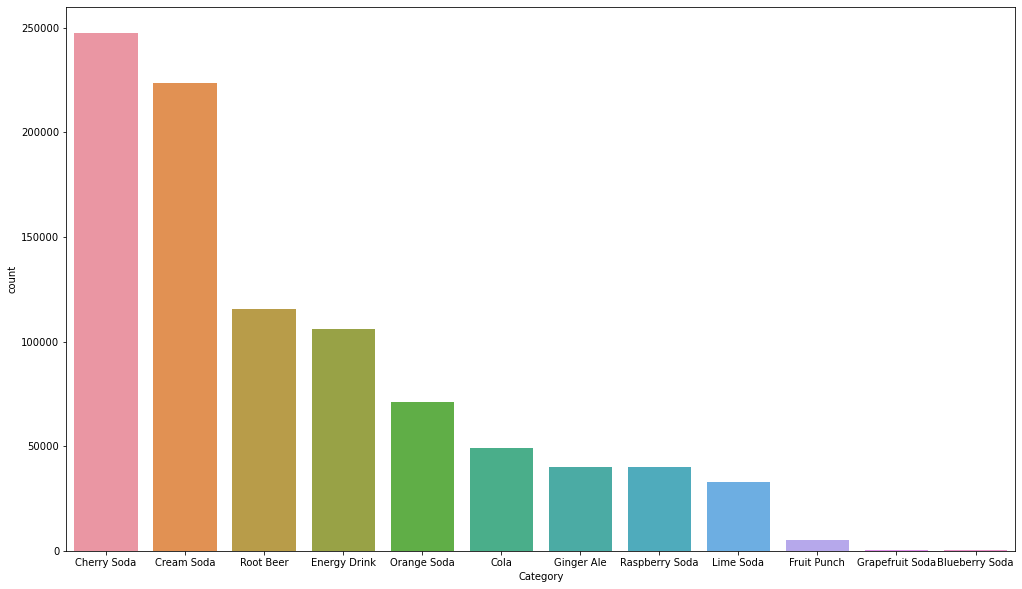

In [168]:
fig = plt.figure(figsize = (17,10))
sns.countplot(data = df_cat, x = 'Category', order = df_cat['Category'].value_counts().index)

<AxesSubplot:xlabel='Category', ylabel='count'>

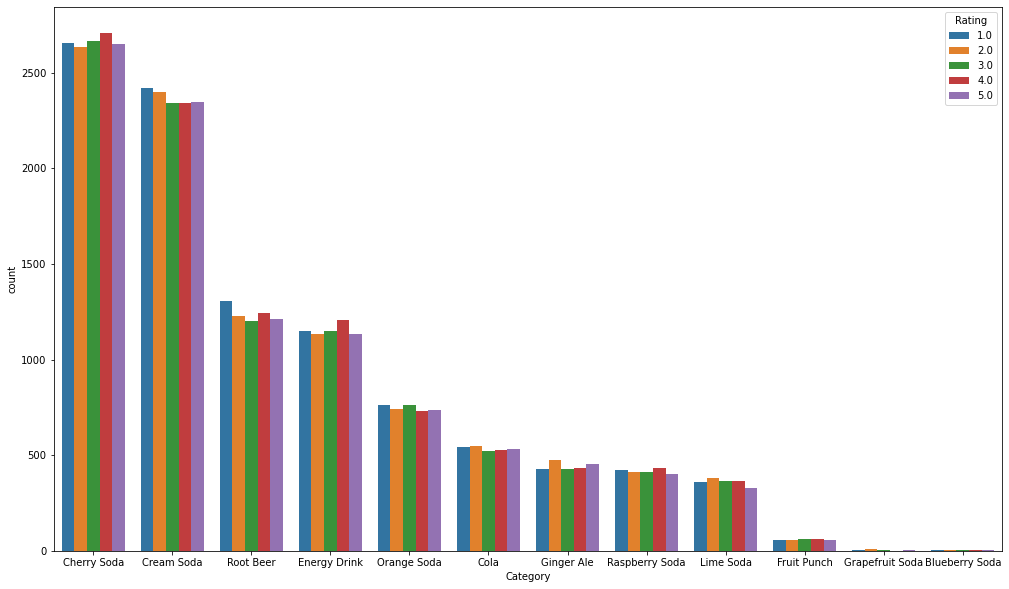

In [169]:
fig = plt.figure(figsize = (17,10))
sns.countplot(data = new_data, x = 'Category', hue = 'Rating', order = df_cat['Category'].value_counts().index)
# This included only the categories that had ratings. We ignored all other rows that did not have a rating. 

In [171]:
# Get average rating of each category. 

In [179]:
df_mean = new_data.groupby(['Category']).mean()
df_mean

,Bottles_Sold,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price,Customer_id,Rating,Purchase_Price
Category,,,,,,,,
Blueberry Soda,5.789474,8.000000,728.947368,3.395263,5.095263,5239.894737,3.368421,23.316842
Cherry Soda,10.840634,12.981817,879.850101,2.590181,3.893800,5473.075964,3.004884,38.868714
Cola,10.082115,13.326959,709.392576,3.358924,5.052640,5574.736783,2.983877,45.687852
Cream Soda,9.420764,13.823395,878.550645,3.042523,4.569963,5500.837564,2.982626,40.532491
Energy Drink,10.407747,12.848349,935.483313,2.650453,3.986675,5484.129690,3.006917,42.538691
Fruit Punch,12.933333,10.476667,791.250000,3.216233,4.832167,5541.403333,3.036667,59.658300
Ginger Ale,8.357658,12.280180,702.446396,3.090793,4.639743,5455.700901,3.005856,37.672743
Grapefruit Soda,2.066667,6.800000,766.666667,3.643333,5.465333,5704.266667,2.466667,10.664667
Lime Soda,7.614659,7.945586,1423.847862,2.481249,3.737135,5466.287618,2.956135,28.292104


It seems that each of the categories received an even distribution of ratings. This makes it difficult to determine whether or not a product should be kept. 

<AxesSubplot:xlabel='Rating', ylabel='count'>

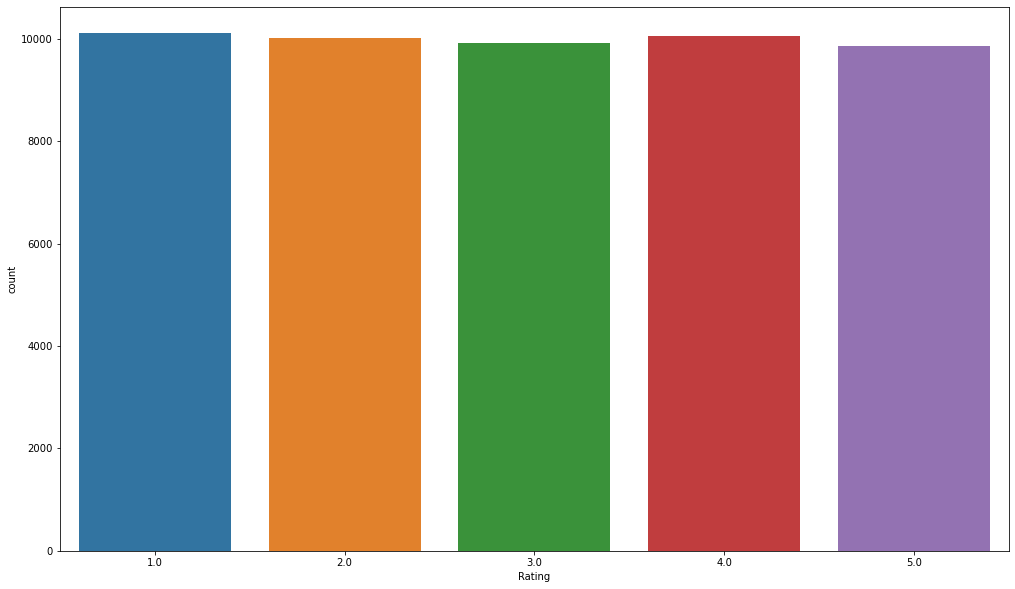

In [154]:
fig = plt.figure(figsize = (17,10))
sns.countplot(data = new_data, x = 'Rating')

There seems to be an equal distribution of ratings across the products and categories. This illustrates why the average rating was 2.99. 

In [143]:
df_cs = new_data[new_data['Category'] == 'Cream Soda']
df_rb = new_data[new_data['Category'] == 'Root Beer']

from scipy import stats
stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

Ttest_indResult(statistic=0.5238119970052665, pvalue=0.6004185721213342)

This means that the relationship between the ratings of Cream Soda and Root Beer are not statistically significant. There is no difference. 

In [145]:
df_cs = new_data[new_data['Category'] == 'Cream Soda']
df_rb = new_data[new_data['Category'] == 'Cherry Soda']

from scipy import stats
stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

Ttest_indResult(statistic=-1.2454476895636994, pvalue=0.21297899371003803)

This means that the relationship between the ratings of Cream Soda and Cherry Soda are not statistically significant. There is no difference. 

In [146]:
df_cs = new_data[new_data['Category'] == 'Cherry Soda']
df_rb = new_data[new_data['Category'] == 'Grapefruit Soda']

from scipy import stats
stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

Ttest_indResult(statistic=1.5999264960250346, pvalue=0.13187369026988424)

This means that the relationship between the ratings of Cherry Soda and Grapefruit Soda are not statistically significant. There is no difference. 